Импорты

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import seed, randrange
from sklearn.model_selection import KFold

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (10, 8)

## Regreesion

Объявление

In [4]:
def trasform_features(features, degree):
    return features.reshape(-1, 1) ** (np.arange(degree))

In [5]:
def compute_metrics(x, y, y_hat):
    residual = y - y_hat
    y_avg = np.sum(y) / x.shape[0]
    mse = np.sum(residual ** 2) / x.shape[0]
    rss = np.sum(residual ** 2)
    tss = np.sum((y - y_avg) ** 2)
    r2 = (tss - rss) / tss
    print(f'MSE:\t{mse}\nRSS:\t{rss}\nTSS:\t{tss}\nR^2:\t{r2}\n')
    return mse, rss, tss, r2

In [6]:
class Regression:
    def __init__(self, degree=2):
        self.degree = degree
        
    def fit(self, X, y):
        Xp = trasform_features(X, self.degree)
        return np.linalg.solve(np.dot(Xp.T, Xp), np.dot(Xp.T, y))
        
    def predict(self, X, W):
        Xp = trasform_features(X, self.degree)
        return np.dot(Xp, W)

In [7]:
x = np.linspace(-5, 5, 5)
y = 5*x + 6
delta = 10 * np.random.randn(len(x))
y_n = y + delta

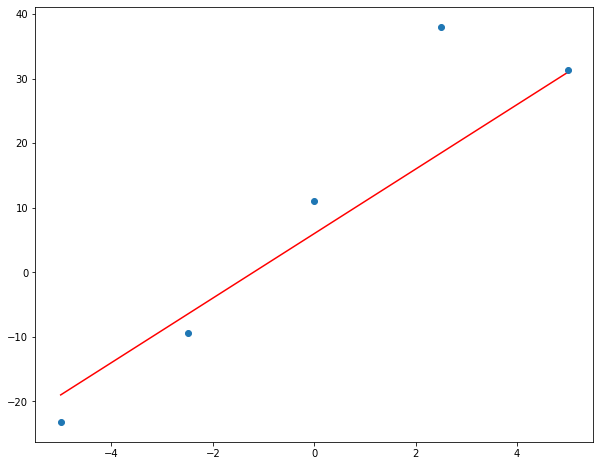

In [8]:
plt.plot (x, y, 'r');
plt.plot (x, y_n, 'o');

In [9]:
lin = Regression()
W_l = lin.fit(x, y_n)
res_l = lin.predict(x, W_l)

In [10]:
W_l

array([9.58768522, 6.26291636])

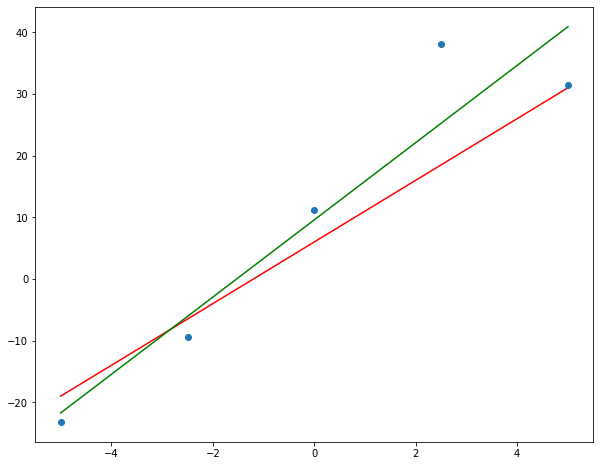

In [11]:
plt.plot (x, y, 'r');
plt.plot (x, y_n, 'o');
plt.plot(x, res_l, 'g');

In [12]:
compute_metrics(x, y, res_l)

MSE:	32.80845699593539
RSS:	164.04228497967694
TSS:	1562.5
R^2:	0.8950129376130068



(32.80845699593539, 164.04228497967694, 1562.5, 0.8950129376130068)

## Polynomial

In [13]:
def noise_func(x):
    y = np.sin(x) / np.cosh(x)
    Delta = 0.1 * np.random.randn(len(x))
    return y + Delta

def func(x):
    return np.sin(x) / np.cosh(x)

In [14]:
x = np.linspace(-5, 5, 200)

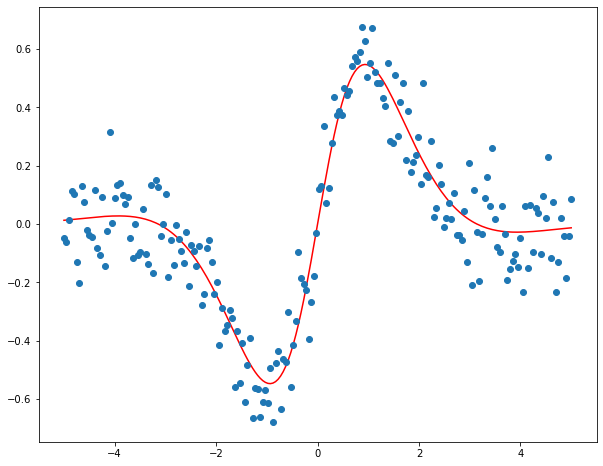

In [15]:
plt.plot (x, func(x), 'r')
plt.plot (x, noise_func(x), 'o')

In [16]:
k_fold = KFold(n_splits=5, shuffle=True)
l_mse = []
l_rss = []
l_tss = []
l_r2 = []
for i in range(1, 30):
    print(f"Power: {i}\n")
    for train, test in k_fold.split(x):
        lin = Regression(i)
        W_l = lin.fit(x[train], noise_func(x[train]))
        res_l = lin.predict(x[test], W_l)
        mse, rss, tss, r2 = compute_metrics(x[test], func(x[test]), res_l);
        l_mse.append(mse)
        l_rss.append(rss)
        l_tss.append(tss)
        l_r2.append(r2)
    print(f'MSE:\t{np.mean(mse)}\nRSS:\t{np.mean(rss)}\nTSS:\t{np.mean(tss)}\nR^2:\t{np.mean(r2)}\n')

Power: 1

MSE:	0.06792680568768483
RSS:	2.7170722275073933
TSS:	2.7047086553474045
R^2:	-0.004571128995925372

MSE:	0.05131449169144424
RSS:	2.0525796676577697
TSS:	2.047588755392717
R^2:	-0.0024374583284402875

MSE:	0.08333764816823756
RSS:	3.3335059267295026
TSS:	3.3210540010134766
R^2:	-0.0037493897155018037

MSE:	0.08673553032777323
RSS:	3.4694212131109294
TSS:	3.422667348011786
R^2:	-0.013660066943491422

MSE:	0.0742658486257846
RSS:	2.970633945031384
TSS:	2.8209875250500724
R^2:	-0.05304752986408738

MSE:	0.0742658486257846
RSS:	2.970633945031384
TSS:	2.8209875250500724
R^2:	-0.05304752986408738

Power: 2

MSE:	0.058885871368991795
RSS:	2.3554348547596717
TSS:	2.4440708035176453
R^2:	0.03626570418107514

MSE:	0.05836957389948742
RSS:	2.334782955979497
TSS:	2.375909372176295
R^2:	0.017309757972429306

MSE:	0.09093630151508067
RSS:	3.6374520606032266
TSS:	3.854206282130339
R^2:	0.056238355101041915

MSE:	0.08352466266317196
RSS:	3.3409865065268782
TSS:	3.42688449951672
R^2:	0.02506

## Regularization

In [17]:
class SvdRegression(Regression):
    def fit(self, X, y, alpha):
        Xp = trasform_features(X, self.degree)
        return np.linalg.pinv(Xp, rcond = alpha) @ y

In [18]:
class RidgeRegression(Regression):
    def fit(self, X, y, alpha):
        Xp = trasform_features(X, self.degree)
        X_t_X = np.dot(Xp.T, Xp)
        X_a = X_t_X + np.eye (self.degree) * alpha
        return np.linalg.solve(X_a, np.dot(Xp.T, y))

In [19]:
class LassoRegression(Regression):
    def fit(self, X, y, alpha):
        W = np.eye(self.degree)
        
        Xp = trasform_features(X, self.degree)
        a = np.linalg.solve(np.dot(Xp.T, Xp), np.dot(Xp.T, y))
    
        eps = 0.001

        for it in range (0, 20):

            ait = a            

            for j in range (0, self.degree):
                W[j,j]=1./abs(ait[j]) 

            a = np.linalg.solve(np.dot(Xp.T, Xp) + W * alpha, np.dot(Xp.T, y))
            eit = a - ait
            epsit = (sum(eit**2))**0.5/len(eit)


            if (epsit<=eps):
                break 

        return a        

In [20]:
# Prepare data
n = 24
coefs = np.array ([-4.7, -3.5, 2.1, -1, 0.05, 4.5])
x = np.linspace(0, 2, n)
y = trasform_features(x, 6) @ coefs
Delta = 0.1 * np.random.randn(n)
y_hat = y + Delta

In [21]:
poly = Regression(6)
svd = SvdRegression(6)
ridge = RidgeRegression(6)
lasso = LassoRegression(6)

In [22]:
params = [1, 0.1, 0.01, 0.001, 0.0001]

In [23]:
# SVD hyperparameter

best_svd = dict()
for item in params:
    svd_coef = svd.fit(x, y_hat, item)
    best_svd[f"{item}"] = sum(abs(coefs - svd_coef))

In [24]:
best_svd

{'1': 15.85,
 '0.1': 8.27986765066608,
 '0.01': 7.133467644555638,
 '0.001': 3.7521404671172025,
 '0.0001': 1.66115893257458}

In [25]:
# Rigde hyperparameter

best_ridge = dict()
for item in params:
    ridge_coef = ridge.fit(x, y_hat, item)
    best_ridge[f"{item}"] = sum(abs(coefs - ridge_coef))

In [26]:
best_ridge

{'1': 7.252609773935853,
 '0.1': 6.30836557127337,
 '0.01': 3.9389681410154482,
 '0.001': 2.5076294676928454,
 '0.0001': 0.6112521579852859}

In [27]:
# Lasso hyperparameter

best_lasso = dict()
for item in params:
    lasso_coef = lasso.fit(x, y_hat, item)
    best_lasso[f"{item}"] = sum(abs(coefs - lasso_coef))

In [28]:
best_lasso

{'1': 4.867576616215426,
 '0.1': 4.584458265202902,
 '0.01': 3.3670264207155984,
 '0.001': 2.6064341024346356,
 '0.0001': 0.7073234288182382}

In [29]:
poly_coef = poly.fit(x, y_hat)
svd_coef = svd.fit(x, y_hat, float(min(best_svd, key=best_svd.get)))
ridge_coef = ridge.fit(x, y_hat, float(min(best_ridge, key=best_ridge.get)))
lasso_coef = lasso.fit(x, y_hat, float(min(best_lasso, key=best_lasso.get)))

In [30]:
print(f"Poly err:\t{sum(abs(coefs - poly_coef))}")
print(f"Ridge err:\t{sum(abs(coefs - ridge_coef))}")
print(f"SVD err:\t{sum(abs(coefs - svd_coef))}")
print(f"Lasso err:\t{sum(abs(coefs - lasso_coef))}")

Poly err:	1.661158930249925
Ridge err:	0.6112521579852859
SVD err:	1.66115893257458
Lasso err:	0.7073234288182382


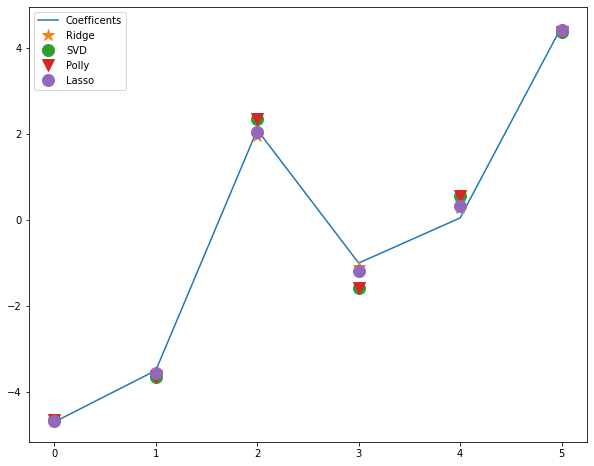

In [31]:
plt.plot (coefs, label='Coefficents')
plt.plot (ridge_coef, '*', label='Ridge', markersize=12)
plt.plot (svd_coef, 'o', label='SVD', markersize=12)
plt.plot (poly_coef, 'v', label='Polly', markersize=12)
plt.plot (lasso_coef, 'o', label='Lasso', markersize=12)
plt.legend()

## Robust

In [32]:
def func(x):
    return 5 * x + 6

In [33]:
x = np.linspace(-5, 5, 40)
y = func(x)
delta =  np.random.randn(len(x))
y_n = y + delta

In [34]:
x[0] = 5
x[1] = -4
x[39] = -5
x[38] = 4

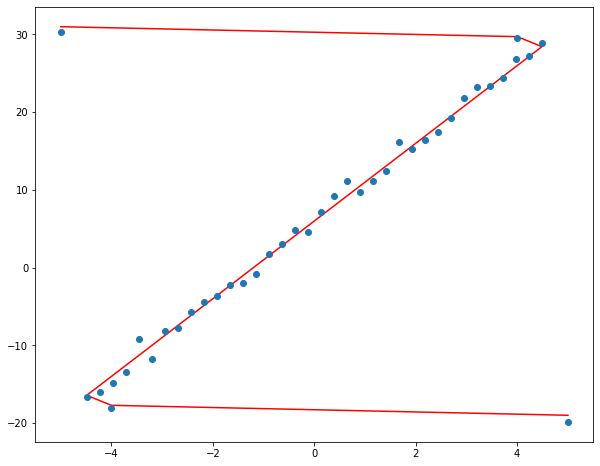

In [35]:
plt.plot (x, y, 'r');
plt.plot (x, y_n, 'o');

In [36]:
lin = Regression()
W_l = lin.fit(x, y_n)
res_l = lin.predict(x, W_l)

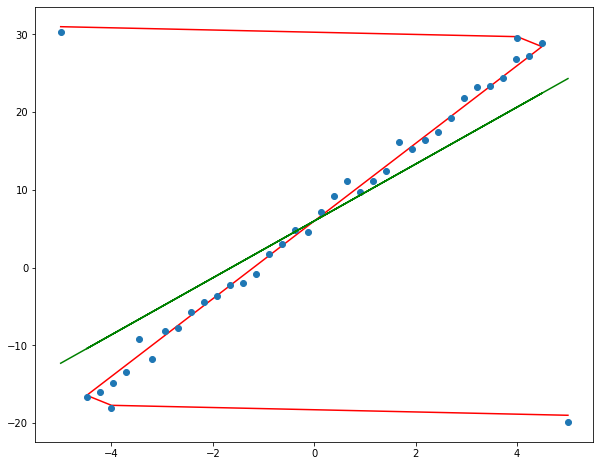

In [37]:
plt.plot (x, y, 'r');
plt.plot (x, y_n, 'o');
plt.plot(x, res_l, 'g');

In [38]:
class RobustRegression(Regression):
    def fit(self, X, y, dist=1):
        
        Xp = trasform_features(X, self.degree)
        a = np.linalg.solve(np.dot(Xp.T, Xp), np.dot(Xp.T, y))

        yr = y @ np.eye(len(x))

        eps = 0.001


        for it in range (0, 10):

            ait = a  
            XpA = np.dot(Xp, a)
            res = np.dot(Xp, a) - yr        

            for i in range (0, n):
                
                if (res[i] > dist):
                    yr[i] = XpA[i] - dist
                    
                if (res[i] < -dist):
                    yr[i] = XpA[i] + dist

            a = np.linalg.solve(np.dot(Xp.T, Xp), np.dot(Xp.T, yr))

            eit = a - ait
            epsit = (sum(eit**2))**0.5/len(eit)

            if (epsit<=eps):
                print ()
                break 

        return a

In [39]:
robust = RobustRegression()
W = robust.fit(x, y_n, 3)
result = robust.predict(x, W)

In [40]:
compute_metrics(x, func(x), result);

MSE:	15.513984827436095
RSS:	620.5593930974438
TSS:	8435.60157790927
R^2:	0.9264356682370427



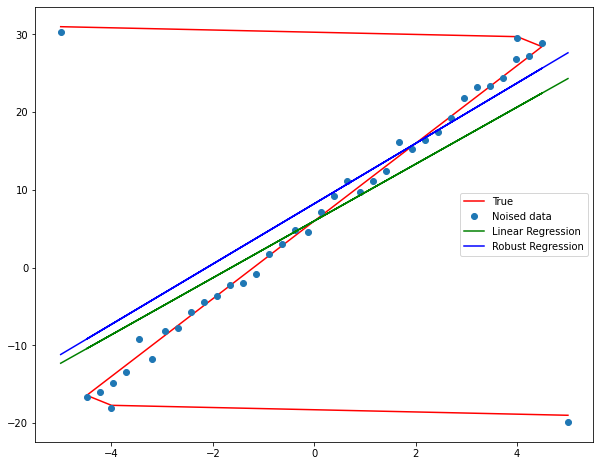

In [41]:
plt.plot (x, y, 'r', label='True');
plt.plot (x, y_n, 'o', label='Noised data');
plt.plot(x, res_l, 'g', label='Linear Regression');
plt.plot(x, result, 'b', label='Robust Regression');
plt.legend();

In [42]:
robust = RobustRegression()
W = robust.fit(x, y_n, 7)
result = robust.predict(x, W)

In [43]:
compute_metrics(x, func(x), result);

MSE:	6.036117898660085
RSS:	241.4447159464034
TSS:	8435.60157790927
R^2:	0.9713778900394388



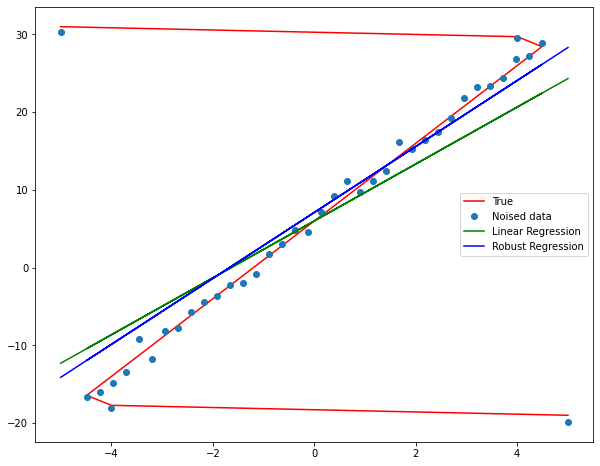

In [44]:
plt.plot (x, y, 'r', label='True');
plt.plot (x, y_n, 'o', label='Noised data');
plt.plot(x, res_l, 'g', label='Linear Regression');
plt.plot(x, result, 'b', label='Robust Regression');
plt.legend();

# Natural Cubic Spline

In [45]:
def nat_cubic_spline(num_of_nodes, Xk, x):
    
    n = len(x)
    PhiFunArray = np.zeros ((n, num_of_nodes))
    Dkk = np.zeros ((n, num_of_nodes))
    Dk = np.zeros ((n, num_of_nodes))
        
    PhiFunArray [:,0] = 1 
    PhiFunArray [:,1] = x 
    
    for k in range (0, num_of_nodes):
        Dkk [:,k] = 0.
        for i in range (0, len(x)):
            if (x[i]>Xk[k]):
                Dkk [i,k] = (x[i] - Xk[k])**3
                    
    for k in range (0, num_of_nodes-1):
        Dk[:,k] = (Dkk [:,k] - Dkk [:,num_of_nodes-1])/(Xk[num_of_nodes-1]-Xk[k])
        
    for k in range (0, num_of_nodes-2):
        PhiFunArray [:,k+2] = Dk[:,k] - Dk[:,num_of_nodes-2]
           
    return PhiFunArray

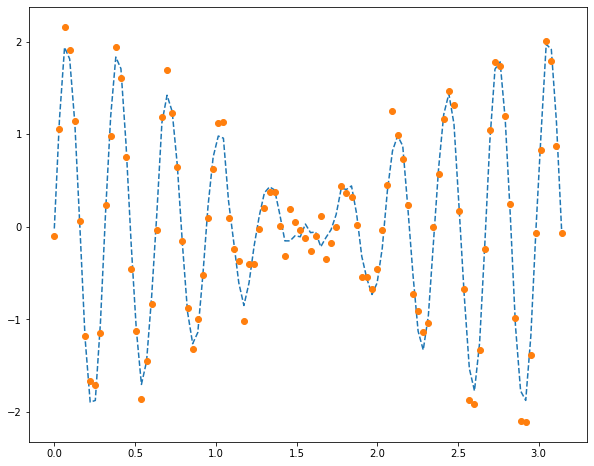

In [46]:
n = 100

a = 0
b = np.pi

x = np.linspace(a, b, n)
y = np.sin (19*x) + np.sin (21*x) + 0.05 * np.random.randn(len(x))

num_of_nodes = 50

Xk = np.zeros(num_of_nodes)

for k in range (0, num_of_nodes):
    Xk[k] = a + (b - a)*(k+1)/(num_of_nodes+1)

y_n = y + 0.2 * np.random.randn(len(x))

plt.plot (x, y, '--')
plt.plot (x, y_n, 'o')

In [47]:
class SplineRobustRegression(Regression):
    def fit(self, X, y, num_of_nodes, Xk, dist=1):
        
        Xp = nat_cubic_spline(num_of_nodes, Xk, X)
        
        a = np.linalg.solve(np.dot(Xp.T, Xp), np.dot(Xp.T, y))

        yr = y @ np.eye(len(X))

        eps = 0.001


        for it in range (0, 10):

            ait = a  
            XpA = np.dot(Xp, a)
            res = np.dot(Xp, a) - yr        

            for i in range (0, n):
                
                if (res[i] > dist):
                    yr[i] = XpA[i] - dist
                    
                if (res[i] < -dist):
                    yr[i] = XpA[i] + dist

            a = np.linalg.solve(np.dot(Xp.T, Xp), np.dot(Xp.T, yr))

            eit = a - ait
            epsit = (sum(eit**2))**0.5/len(eit)

            if (epsit<=eps):
                print ()
                break 

        return a
    
    def predict(self, X, W, num_of_nodes, Xk):
        Xp = nat_cubic_spline(num_of_nodes, Xk, X)
        return np.dot(Xp, W)

In [48]:
spline = SplineRobustRegression()
W = spline.fit(x, y_n, num_of_nodes, Xk, 2)
result = spline.predict(x, W, num_of_nodes, Xk)

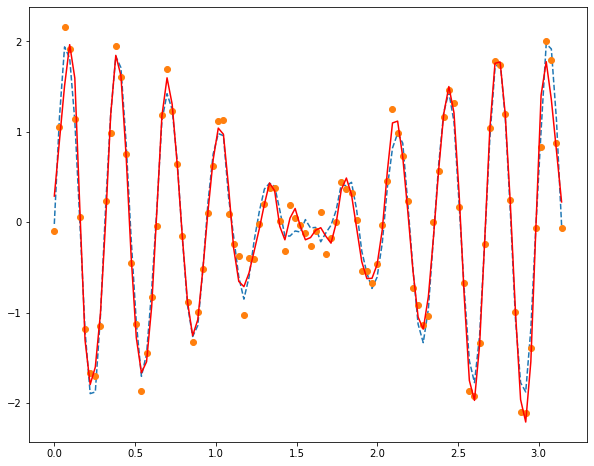

In [49]:
plt.plot (x, y, '--')
plt.plot (x, y_n, 'o')
plt.plot (x, result, 'r')